In [11]:
import json, os, requests
from PIL import Image

# Guardamos la API Key en una variable, esta API Key sirve para autenticarnos con Azure
subscription_key = "CFXCZYVJMgIJ3dkBwgdOAzIpuZFDscbls8dY7ZMKqlSIMCcNeKZoJQQJ99BCACYeBjFXJ3w3AAAEACOG3N9e"

# URL de nuestra API, esta URL la podemos obtener de la misma pagina donde obtuvimos
# la API Key + el metodo de detect
face_api_url = 'https://facerecognition25.cognitiveservices.azure.com' + '/face/v1.0/detect'

# Guardamos la URL de un imagen, en este caso usamos una de Wikipedia
image_url = 'https://upload.wikimedia.org/wikipedia/commons/a/a9/Bengali_people.jpg'

# Creamos un objeto que seran los Headers de nuestro HTTP Request
# que servira para la autenticacion
headers = { 'Ocp-Apim-Subscription-Key': subscription_key }

# Parametros que se iran en la URL en formato de Querystring
# ?returnFaceId=false&returnFaceLandmarks=false
params = {
    'returnFaceId': 'false',
    'returnFaceLandmarks': 'false',
}

# Hacemos un request POST
response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
resp_json = response.json()
resp_json

[{'faceRectangle': {'top': 2305, 'left': 141, 'width': 600, 'height': 600}},
 {'faceRectangle': {'top': 4389, 'left': 3925, 'width': 541, 'height': 541}},
 {'faceRectangle': {'top': 2384, 'left': 2510, 'width': 540, 'height': 540}},
 {'faceRectangle': {'top': 1320, 'left': 3884, 'width': 508, 'height': 508}},
 {'faceRectangle': {'top': 2392, 'left': 1593, 'width': 508, 'height': 508}},
 {'faceRectangle': {'top': 2359, 'left': 3976, 'width': 496, 'height': 496}},
 {'faceRectangle': {'top': 336, 'left': 3300, 'width': 480, 'height': 480}},
 {'faceRectangle': {'top': 1231, 'left': 1636, 'width': 479, 'height': 479}},
 {'faceRectangle': {'top': 4392, 'left': 3318, 'width': 474, 'height': 474}},
 {'faceRectangle': {'top': 1344, 'left': 3246, 'width': 466, 'height': 466}},
 {'faceRectangle': {'top': 4493, 'left': 1912, 'width': 464, 'height': 464}},
 {'faceRectangle': {'top': 3414, 'left': 1851, 'width': 454, 'height': 454}},
 {'faceRectangle': {'top': 3330, 'left': 2457, 'width': 444, 'heig

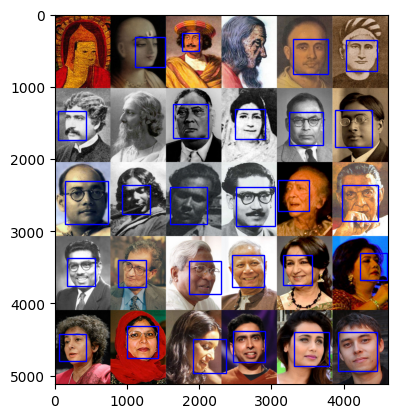

In [33]:
from matplotlib import image
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import urllib.request as urllib2

f = urllib2.urlopen(image_url)
data = image.imread(f, format='jpg')
fig, ax = plt.subplots()

ax.imshow(data)

for face in resp_json:
  rectangle = face['faceRectangle']
  rect = patches.Rectangle((rectangle['left'], rectangle['top']), rectangle['width'], rectangle['height'], linewidth=1, edgecolor='b', facecolor='none')
  ax.add_patch(rect)

plt.show()

![Test Image](https://upload.wikimedia.org/wikipedia/commons/a/a9/Bengali_people.jpg)